<a href="https://colab.research.google.com/github/awwesomeman/data-analysis/blob/main/%E6%99%BA%E6%85%A7%E5%9E%8B%E8%B3%87%E8%A8%8A%E7%B3%BB%E7%B5%B1_%E4%BD%9C%E6%A5%AD_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from numpy import random

import matplotlib.pyplot as plt

#(B)畫出{𝑣, 𝑚, 𝑠, 𝑑}各自訊號圖,並標示相關資訊。(⁡ 0 ≤ 𝑡 ≤ 5。取樣間隔時間為 0.01 秒。) 

In [65]:
np.random.seed(0)
t = np.arange(0,5.01,0.01)

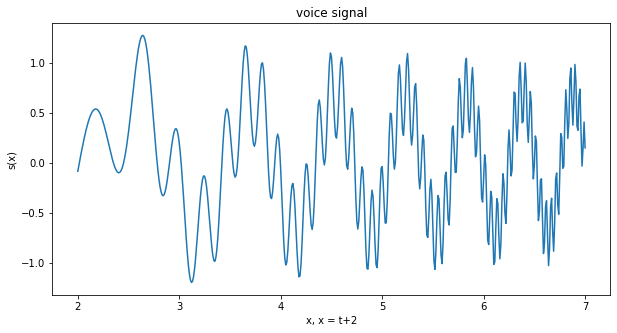

In [66]:
x = t+2
s = np.array([0.7*(np.sin(_**2 - 0.7*_ + 3)) + 0.9* np.e**(-0.15*_) * np.cos(-1*_**3+5*_-1) for _ in x])

plt.figure(figsize=(10,5))
plt.xlabel("x, x = t+2") 
plt.ylabel('s(x)')
plt.title('voice signal')
plt.plot(x,s)

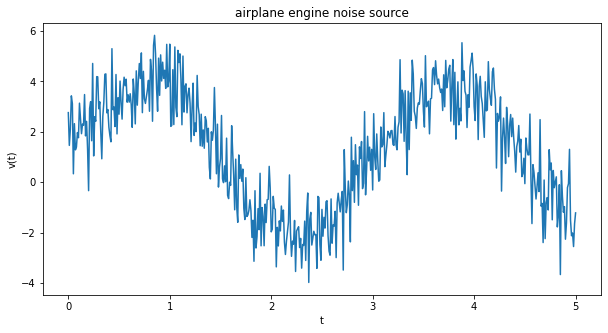

In [67]:
np.random.seed(0)
v = np.array([3*np.sin(2*np.pi*_/3)+np.random.normal(1) for _ in t])

plt.figure(figsize=(10,5))
plt.xlabel("t") 
plt.ylabel('v(t)')
plt.title('airplane engine noise source')
plt.plot(t,v)

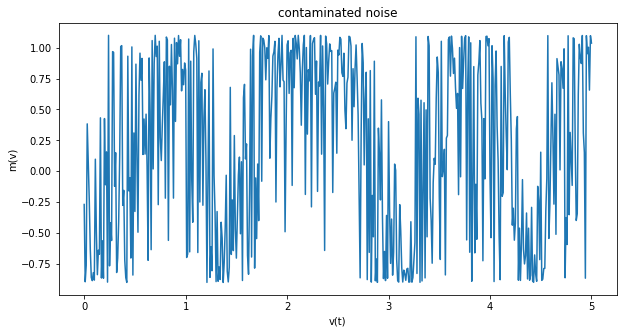

In [68]:
m = [np.cos(_+np.pi/2)+0.1 for _ in v]

plt.figure(figsize=(10,5))
plt.ylabel('m(v)')
plt.xlabel("v(t)") 
plt.title('contaminated noise')
plt.plot(t,m)

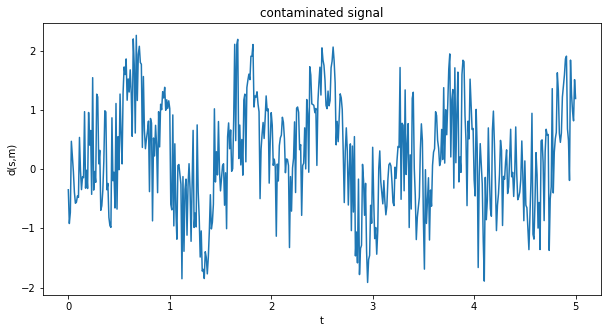

In [69]:
d = s+m
plt.figure(figsize=(10,5))
plt.ylabel('d(s,m)')
plt.xlabel("t")
plt.title('contaminated signal')
plt.plot(t,d)

#(C)畫出 MSE 隨疊代而變化之曲線(稱為學習曲線) ,並標示相關資訊。

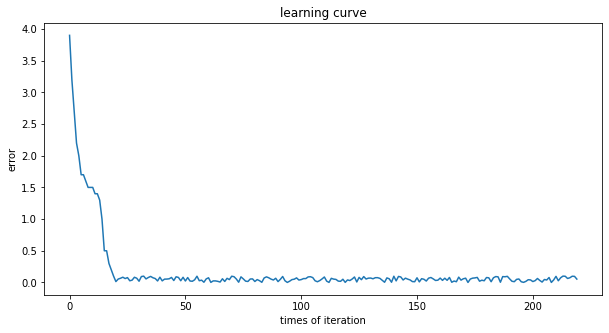

In [63]:
w = np.array([0,0,0])  # 初始權重向量
alpha = 0.01 #學習率
state = True
err = []
adaoutput = []
while state:
  for t in range(2,len(v)):

    input = np.array([v[t], v[t-1],v[t-2]])
    a = w.dot(input)
    adaoutput.append(a)
    error = d[t] - a 
    err.append(error)
    if np.array_equiv(np.round(w,4),np.round(w + 2 * alpha * error * input,4)):
      
      print("final weight = ", w)
      state = False
      break
    else:

      w = np.round(w + 2 * alpha * error * input,4)
      #print("weight = ", w)

plt.figure(figsize=(10,5))
plt.ylabel('error')
plt.xlabel('times of iteration')
plt.title('learning curve')
plt.plot(error)
plt.show()

#(D)畫出{𝑠, 𝑒}等 2 個訊號在同一張圖,並標示相關資訊。(⁡ 0 ≤ 𝑡 ≤ 5。取樣間隔時間為 0.01 秒。)

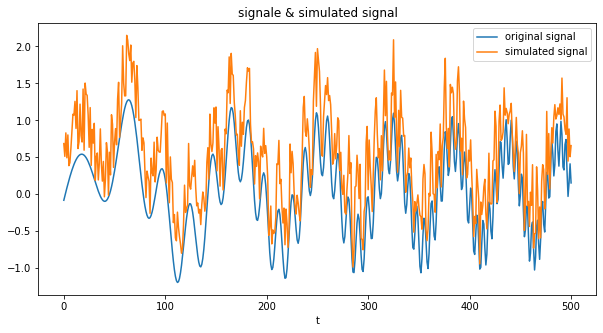

In [84]:
plt.figure(figsize=(10,5))
plt.xlabel("t") 
plt.title('signale & simulated signal')
plt.plot(s)
plt.plot(simulated)
plt.legend(['original signal','simulated signal'])

#(E)畫出(𝑠 − 𝑒)訊號圖, 並標示相關資訊。(⁡ 0 ≤ 𝑡 ≤ 5。取樣間隔時間為 0.01 秒。) 

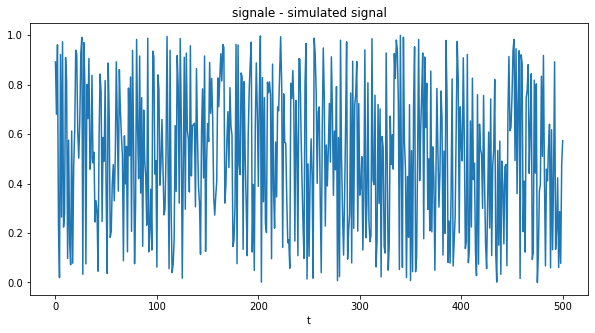

In [86]:
plt.figure(figsize=(10,5))
plt.xlabel("t") 
plt.title('signale - simulated signal')
plt.plot(s-simulated)

#(F)畫出(𝑚 − 𝑎)訊號圖, 其中𝑎為 ADALINE 之輸出訊號,並標示相關資訊。(⁡ 0 ≤ 𝑡 ≤ 5。取樣間隔時間為 0.01 秒。)

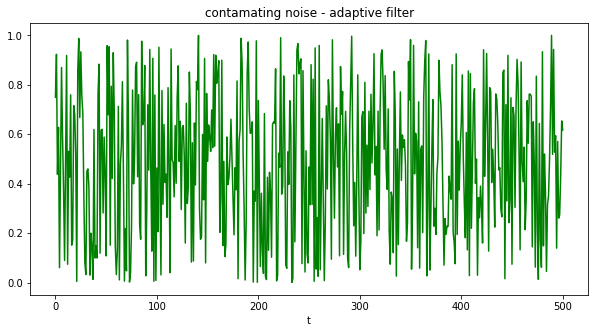

In [87]:
plt.figure(figsize=(10,5))
plt.xlabel("t") 
plt.title('contamating noise - adaptive filter')
plt.plot(m-adaoutput, color='g')

# 法2 (供參考)

In [65]:
r=3
data  = []
for  i in range(r-1,v.shape[0]):
    lister = []
    for i in range(r-1,-1,-1):
        lister.append(v[i])
    data.append(lister)
data = np.asarray(data)
target = np.asarray(m[r-1:])

In [66]:
input_mat=data
num_features=data.shape[1]
training_size=data.shape[0]


#The ADALINE weight update rule
def weight_update(weight_vec,err_val,input_vec,lr):
    wlen=len(weight_vec)-1
    change=2.0*lr*err_val
    for i in range(wlen):
        weight_vec[i]+=change*input_vec[i]
    weight_vec[-1]+=change
    return weight_vec

In [67]:
length=r
patterns=data.shape[1]
e_plot=[]
#The regenerated signal is stored in e_plot
error=[]
#Error/Deviation from the True Value
bias=1

In [68]:

def main():
    weight_vec=np.random.random_sample(r)         #initializing a random weight vector
    choices=np.arange(0.1,0.2,0.1)               #initializing choices for tuning the learning rate
    #The following code tries out various learning rates to find the best one.
    for k in range(len(choices)):
        weight_vec=np.random.random_sample(r)
        weight_vec = np.append(weight_vec,bias)
        lr=choices[k]

        for i in range(target.shape[0]): 
            true=target[i]
            pred = 0
            for j in range(r):
                pred+=(input_mat[i][j]*weight_vec[j])
            pred+=weight_vec[-1]
            err_val=true-pred  #computing error of the prediction
            error.append(np.abs(err_val))
            e_plot.append(d[r-1+i]-pred) #Storing the regenerated signal here 
            weight_vec=weight_update(weight_vec,err_val,input_mat[i],lr)  #updating the weight vector suitably
         
    return weight_vec          #returns the final updated weight vector
        
weight_vec=main()